In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [41]:
print("key of iris dataset: \n{}".format(iris_dataset.keys()))

key of iris dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [42]:
type(iris_dataset)

sklearn.utils.Bunch

In [43]:
print(iris_dataset['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
'''The value of the key target_names is an array of strings, containing the species of
flower that we want to predict'''

'The value of the key target_names is an array of strings, containing the species of\nflower that we want to predict'

In [45]:
print("Target names: {}".format(iris_dataset['target_names']))


Target names: ['setosa' 'versicolor' 'virginica']


In [46]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [47]:
print("Shape of data: {}".format(iris_dataset['data'].shape))



Shape of data: (150, 4)


In [48]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))


First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [49]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [50]:
print("Target:\n{}".format(iris_dataset['target']))


Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [52]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


X_train shape: (112, 4)
y_train shape: (112,)


In [53]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

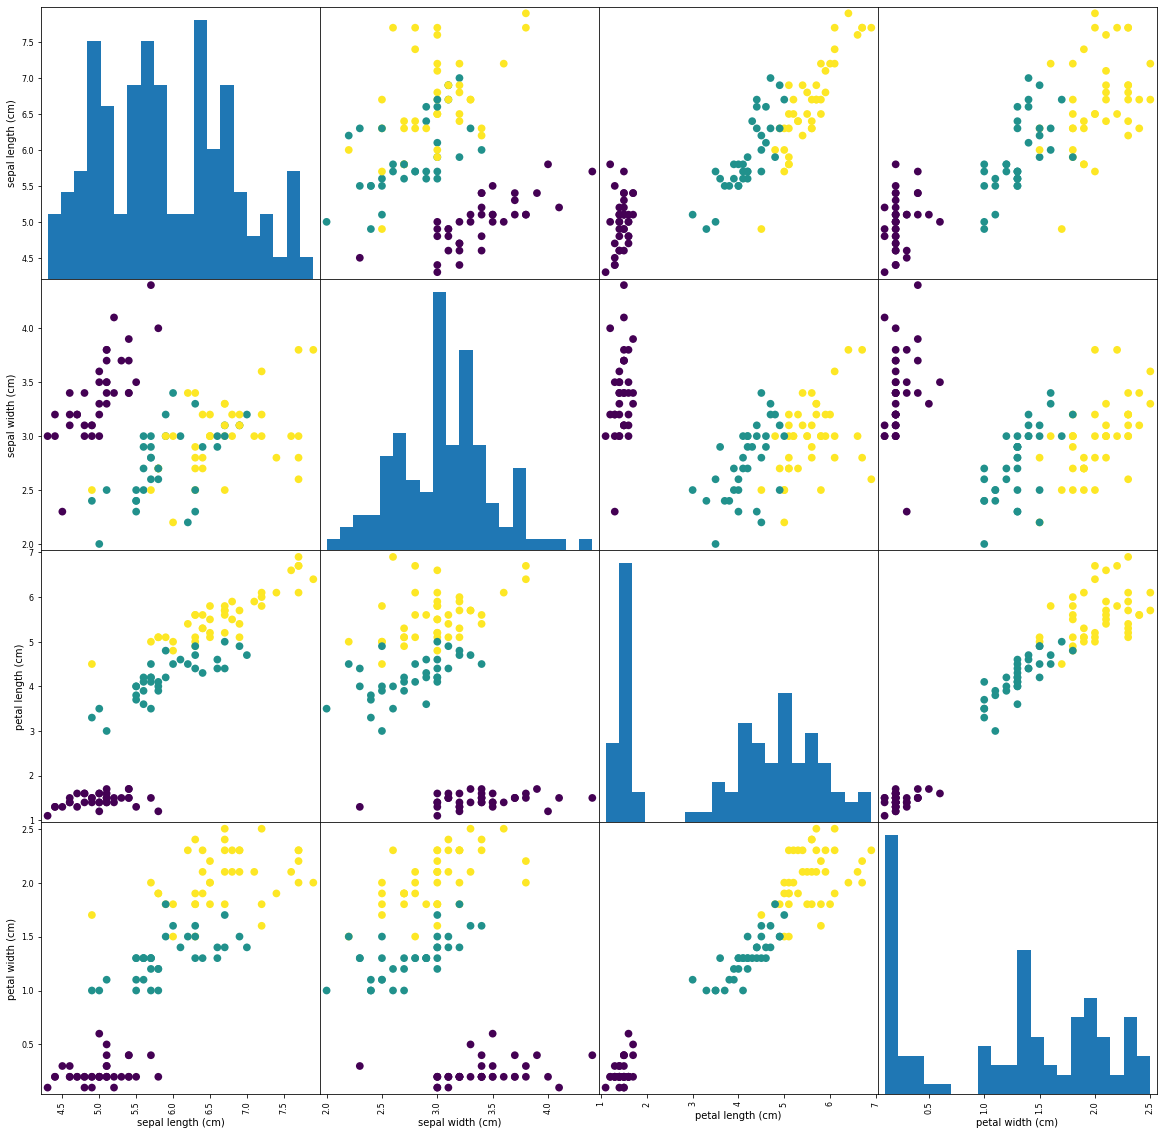

In [54]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize=(20,20), marker='o', hist_kwds={'bins':20}, s=60, alpha = 1)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
X_new = np.array([[5,2.9,1,0.2]])

In [58]:
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [59]:
prediction = knn.predict(X_new)
print(f"Prediction : {prediction}")
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction : [0]
Predicted target name: ['setosa']


In [60]:
y_pred = knn.predict(X_test)
print("Test set predictions: {}".format(y_pred))

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [61]:
print("Test success: {:.2f}".format(np.mean(y_pred == y_test)))

Test success: 0.97


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)

In [64]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [65]:
gbrt.classes_

array([0, 1, 2])

In [71]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))


Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [70]:
print("Argmax of decision function:\n{}".format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [72]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [73]:
print("Argmax of predicted probabilities:\n{}".format(
np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
